In [1]:
import os
import zipfile
import tensorflow as tf
import shutil
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from os import getcwd

In [4]:
os.listdir("{getcwd()}/../../../../Kaggle")
os.listdir("{getcwd()}/../../../Kaggle")

['sarcasm.json', 'tmp']

In [3]:
path_dogs_and_cats = f"{getcwd()}/../../../../Kaggle/dogs_and_cats.zip" 
origin_path = "{getcwd()}/../../../Kaggle/tmp" #github 폴더 밑에 Kaggle
local_zip = path_dogs_and_cats 
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall(origin_path)
zip_ref.close()

Origin_path / dataset 하위에 training set폴더와 test set폴더가 각각 존재.

In [5]:
print(os.listdir(origin_path+'/dataset/training_set'))
print(os.listdir(origin_path+'/dataset/test_set'))
print(len(os.listdir(origin_path+'/dataset/training_set/dogs')))
print(len(os.listdir(origin_path+'/dataset/test_set/dogs')))

['cats', 'dogs']
['cats', 'dogs']
4000
1000


Image Generator를 이용해서 훈련데이터를 생성해줄 때 augmentation을 적용해줄 수 있다.
아래 첫번째셀 : 픽셀 값만 rescale
아래 두번째셀 : 여러 값들에 대해 변수 지정

In [7]:
# Iamge Generator를 이용해서 rescale만 하는 경우
TRAINING_DIR = origin_path+'/dataset/training_set'
train_datagen = ImageDataGenerator(rescale=1.0/255.0)
train_generator = train_datagen.flow_from_directory(TRAINING_DIR, batch_size=20, class_mode='binary', target_size=(150,150))

VALIDATION_DIR = origin_path+'/dataset/test_set'
validation_datagen = ImageDataGenerator(rescale = 1.0/255.0)
validation_generator =  validation_datagen.flow_from_directory(VALIDATION_DIR, batch_size=20, class_mode='binary', target_size=(150,150))

Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [ ]:
# Iamge Generator를 이용해서 image augmentation을 하는 경우
TRAINING_DIR = origin_path+'/dataset/training_set'
train_datagen =ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')
train_generator = train_datagen.flow_from_directory(TRAINING_DIR, batch_size=20, class_mode='binary', target_size=(150,150))

VALIDATION_DIR = origin_path+'/dataset/test_set'
validation_datagen = ImageDataGenerator(rescale = 1.0/255.0)
validation_generator =  validation_datagen.flow_from_directory(VALIDATION_DIR, batch_size=20, class_mode='binary', target_size=(150,150))

4-layer 의 CNN 모델 이용.

In [6]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), input_shape=(150, 150, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.summary()
model.compile(optimizer=RMSprop(lr=0.001), loss='binary_crossentropy', metrics=['acc'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [10]:
history = model.fit_generator(train_generator,
                              steps_per_epoch=100,
                              epochs=10,
                              verbose=1,
                              validation_data=validation_generator)

Epoch 1/10
100/100 [==============================] - 77s 768ms/step - loss: 0.6400 - acc: 0.6500 - val_loss: 0.6613 - val_acc: 0.6290
Epoch 2/10
100/100 [==============================] - 66s 660ms/step - loss: 0.6284 - acc: 0.6495 - val_loss: 0.6321 - val_acc: 0.6320
Epoch 3/10
100/100 [==============================] - 66s 659ms/step - loss: 0.6045 - acc: 0.6895 - val_loss: 0.5811 - val_acc: 0.6900
Epoch 4/10
100/100 [==============================] - 67s 675ms/step - loss: 0.5912 - acc: 0.6905 - val_loss: 0.7471 - val_acc: 0.6230
Epoch 5/10
100/100 [==============================] - 67s 672ms/step - loss: 0.5682 - acc: 0.7165 - val_loss: 0.5291 - val_acc: 0.7310
Epoch 6/10
100/100 [==============================] - 70s 704ms/step - loss: 0.5419 - acc: 0.7305 - val_loss: 0.5643 - val_acc: 0.7045
Epoch 7/10
100/100 [==============================] - 72s 723ms/step - loss: 0.5040 - acc: 0.7560 - val_loss: 0.5404 - val_acc: 0.7255
Epoch 8/10
100/100 [==============================] - 6

In [40]:
import numpy as np
from tensorflow.keras.preprocessing import image
from IPython.display import Image

os.listdir('../.././Kaggle/cat_dog_test')

['bed-1284238_1280.jpg',
 'cat-1045782_640.jpg',
 'cat-2083492_640.jpg',
 'cat-551554_640.jpg',
 'pug-690566_640.jpg',
 'puppy-1207816_640.jpg']

In [47]:
path = '../.././Kaggle/cat_dog_test/'
img_list = os.listdir(path)

for name in img_list :
    img = image.load_img(path+name, target_size=(150,150))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)

    images = np.vstack([x])
    classes = model.predict(images, batch_size=10)
    print(classes[0])
    if classes[0]>0.5:
        print(" is a dog")
    else:
        print(" is a cat")
    print(path+name)

[1.]
 is a dog
../.././Kaggle/cat_dog_test/bed-1284238_1280.jpg
[0.]
 is a cat
../.././Kaggle/cat_dog_test/cat-1045782_640.jpg
[1.]
 is a dog
../.././Kaggle/cat_dog_test/cat-2083492_640.jpg
[0.]
 is a cat
../.././Kaggle/cat_dog_test/cat-551554_640.jpg
[1.]
 is a dog
../.././Kaggle/cat_dog_test/pug-690566_640.jpg
[1.]
 is a dog
../.././Kaggle/cat_dog_test/puppy-1207816_640.jpg


Text(0.5, 1.0, 'Training and validation loss')

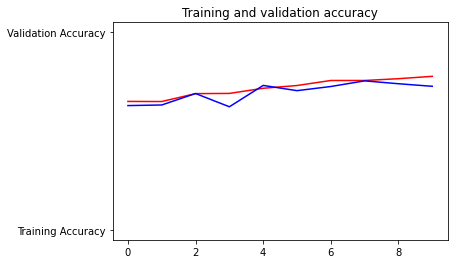

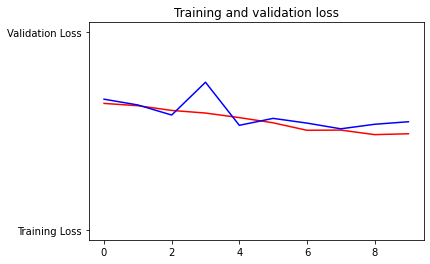

In [11]:
# PLOT LOSS AND ACCURACY
%matplotlib inline

import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")


plt.title('Training and validation loss')

# Desired output. Charts with training and validation metrics. No crash :)

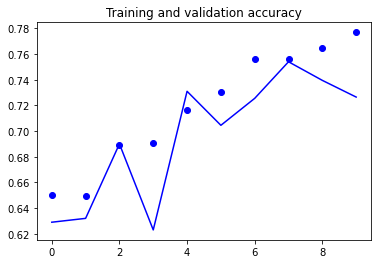

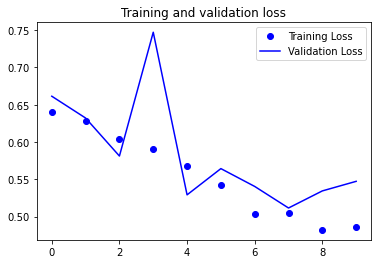

In [14]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()